In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('genes.csv')

In [3]:
df.head()

,gen_one,gene_two,cancer_present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,1
4,7.4,3.4,0


NameError: name 'scatterplt' is not defined

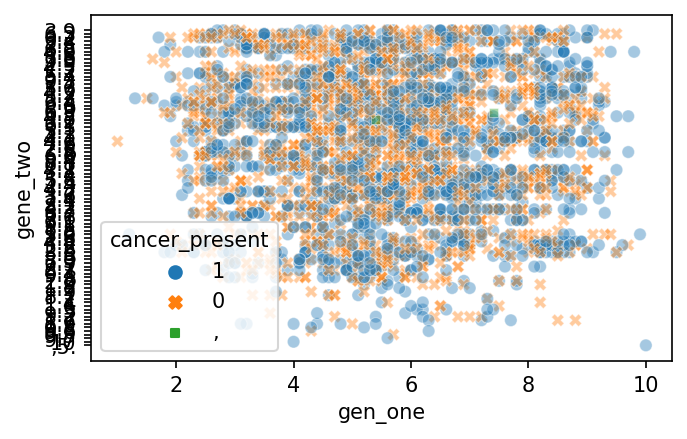

In [4]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(data=df,x="gen_one",y="gene_two",hue="cancer_present",alpha=0.4,style="cancer_present")
help(scatterplt)

In [ ]:
sns.pairplot(data=df,hue="Cancer Present")

In [ ]:
x=df.drop("Cancer Present",axis=1)

In [ ]:
y=df["Cancer Present"]

In [ ]:
df.shape

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
help(KNeighborsClassifier)

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_x_train,y_train)


In [ ]:
y_pred=knn_model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
df["Cancer Present"].value_counts()

In [ ]:
#choosing value of k for knn

In [ ]:
#Elbow method
test_error_rate=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rate.append(test_error)
test_error_rate

In [ ]:
plt.plot(range(1,30),test_error_rate)
plt.ylabel("error_rate")
plt.xlabel("kValue")


In [ ]:
knn_model.get_params()#model parameters

In [ ]:
#method 2 by using pipeline fauction doing GridSearchCV


In [ ]:
#pipeline--------->
operation=[("sacler",scaler),("knn",knn_model)]


In [ ]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(operation)

In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
k_values = list(range(1,20))
k_values

In [ ]:
param_grid={"knn__n_neighbors":k_values,
"knn__metric":["euclidean"] }

In [ ]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')

In [ ]:
full_cv_classifier.fit(scaled_x_train, y_train)

In [ ]:
full_cv_classifier.best_estimator_.get_params()

In [ ]:
full_pred=full_cv_classifier.predict(scaled_x_test)

In [ ]:
print(classification_report(y_test, full_pred))